<a href="https://colab.research.google.com/github/Aban6/Teaching_OOP-for-Business-Applications/blob/main/Class23_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Class 23**

**Logistic Regression**

**Import libraries**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler   #scaling the input features might help the optimization process
import matplotlib.pyplot as plt
import seaborn as sns

**Create a dataframe**

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adding the target column


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Build a Logistic Regression model**

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression Model
logisticRegr = LogisticRegression(solver='liblinear', max_iter=1000)
logisticRegr.fit(X_train, y_train)

# Predictions on the test set
y_pred = logisticRegr.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Extracting Sensitivity, Specificity, and F1 Score from the classification report
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)


In scikit-learn's precision_recall_fscore_support function, which is commonly used to compute classification metrics like precision, recall, F1 score, and support, the term "support" refers to the number of true instances for each class in the test set.

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)

Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1 Score: [1. 1. 1.]
Support: [10  9 11]


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Confusion Matrix**

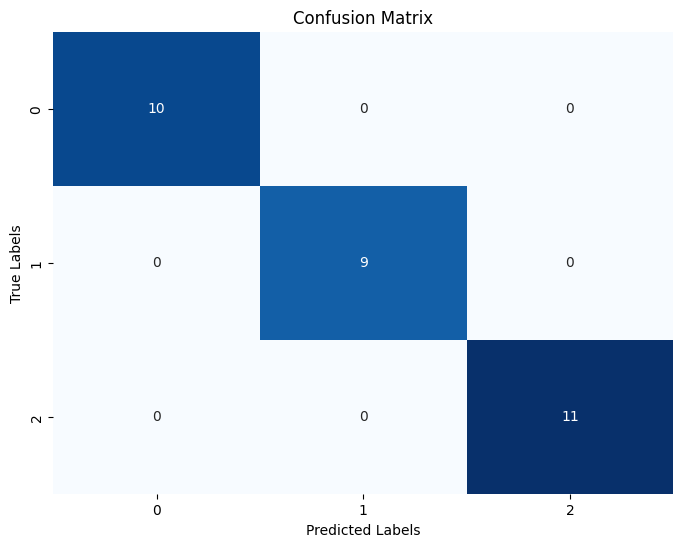

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()